In [76]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

## Load titanic train dataset

In [55]:
train_ds = pd.read_csv('../data/titanic/train.csv', delimiter=',')

# Excluding age with NaN, filter fare in range(100, 400)
train_ds = train_ds[(~train_ds['Age'].isnull()) & (train_ds['Fare'] < 400) & (train_ds['Fare'] > 100)]

ages = train_ds['Age']
fares = train_ds['Fare']

## Model

In [56]:
def lr_model(a, b, ages):
    return a * ages + b

## Data preview

In [46]:
print(ages[:10], len(ages))

27     19.00
88     23.00
118    24.00
195    58.00
215    31.00
268    58.00
269    35.00
297     2.00
299    50.00
305     0.92
Name: Age, dtype: float64 45


In [47]:
print(fares[:10], len(fares))

27     263.0000
88     263.0000
118    247.5208
195    146.5208
215    113.2750
268    153.4625
269    135.6333
297    151.5500
299    247.5208
305    151.5500
Name: Fare, dtype: float64 45


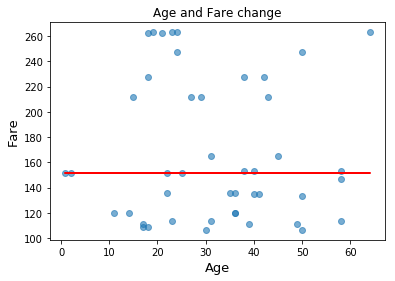

In [71]:
fig, ax = plt.subplots()
ax.scatter(ages, fares, alpha=0.6)
ax.set_xlabel(r'Age', fontsize=13)
ax.set_ylabel(r'Fare', fontsize=13)
ax.set_title('Age and Fare change')

# a, b is calculated by running following command
#
# $ python algorithm/linear_regression.py data/titanic/train.csv
#
a, b = 1.3877787807814457e-16, 151.49999999999568

hypothesis_fares = lr_model(a, b, ages)
plt.plot(ages, hypothesis_fares, 'r')

## Numpy version of linear regression (least-squares solution)

In [ ]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq

-0.20436845912321858 173.93816467002722


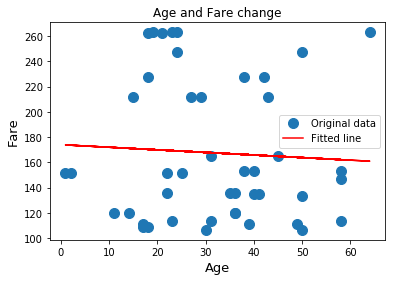

In [68]:
A = np.vstack([ages, np.ones(len(ages))]).T
a, b = np.linalg.lstsq(A, fares, rcond=None)[0]
print(a, b)

fig, ax = plt.subplots()
plt.plot(ages, fares, 'o', label='Original data', markersize=10)
plt.plot(ages, a * ages + b, 'r', label='Fitted line')
ax.set_xlabel(r'Age', fontsize=13)
ax.set_ylabel(r'Fare', fontsize=13)
ax.set_title('Age and Fare change')
plt.legend()

## Scipy version of linear regression

In [72]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

r-squared: 0.0030440317055870783


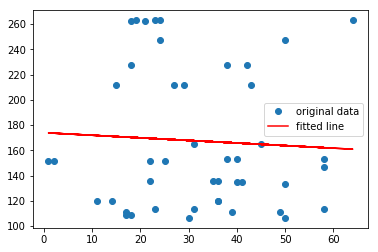

In [75]:
np.random.seed(12345678)
slope, intercept, r_value, p_value, std_err = stats.linregress(ages, fares)

# To get coefficient of determination (r_squared)
print("r-squared:", r_value**2)

plt.plot(ages, fares, 'o', label='original data')
plt.plot(ages, intercept + slope * ages, 'r', label='fitted line')
plt.legend()